<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity_Nonlinear_Functions_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solving nonlinear equations

Many, if not most of the equations you'll encounter in physics are nonlinear.  Nonlinear equations are typically much harder to solve than linear equations.  In fact, for many nonlinear equations there is no analytic solution and computational methods are the only ways to find a solution.  Even with computational methods there is no "one size fits all" approach to finding the solutions of nonlinear equations.  Here, we'll discuss a few different commonly used approaches to solving nonlinear equations, each of which have their plusses and minuses.  Each of these are iterative approaches in which an initial estimate of the solution is refined through multiple iterations of the algorithm.

## The relaxation method

The relaxation method is designed for functions that have this form:

$x = f\left(x\right)$

In the relaxation  method we:
1.  Make an initial guess of the solution, which we call $x=x_0$.
2.  Plug $x_0$ into the right hand side of our function.  Use this to solve for a new value of $x$, which we call $x_1$.  That is, find $x_1$ by:

 $x_1 = f\left(x_0\right)$

3. Use the new value of $x_1$ in the right hand side of our function.  Use this to solve for a new value of $x$, which we call $x_2$.  That is, find $x_2$ by:

 $x_2 = f\left(x_1\right)$

4.  Repeat the above procedure until the difference in $x$ values between iterations is smaller than a desired threshold.

**Activity** Consider the function:

$x = 2-e^{-x}$.

Use the following code to perform the relaxation method with an initial estimate of $x=1.0$. Answer the following questions:

1.  How many iterations does it take for your solution to converge to decimal places? How about to 12 decimal places? (You may need to alter the number of iterations that are run to perform a sufficient number of iterations).

2.  Modify the initial guess.  How does changing the initial value change your convergence?  Try some values that are far from the actual solution.


In [1]:
import numpy as np

x = 1.0

print("Initial estimate of x =",x)
for i in range(10):
  x = 2.0 - np.exp(-x)
  print("Iteration %i gives x="%(i+1),x)

Initial estimate of x = 1.0
Iteration 1 gives x= 1.6321205588285577
Iteration 2 gives x= 1.8044854658474119
Iteration 3 gives x= 1.8354408939220457
Iteration 4 gives x= 1.8404568553435368
Iteration 5 gives x= 1.841255113911434
Iteration 6 gives x= 1.8413817828128696
Iteration 7 gives x= 1.8414018735357267
Iteration 8 gives x= 1.8414050598547234
Iteration 9 gives x= 1.8414055651879888
Iteration 10 gives x= 1.8414056453310121


**Activity:** 

1.  Use the relaxation method to find the solution to the equation:

 $x = \sqrt{1- \ln x}$
   
   use an initial estimate of $x=2.0$. 

2.  By exponentiating both sides of the above equation and rearranging, we get the equivalent equation:

 $x = e^{1-x^2}$

 Use the relaxation method on this equation. Do you get the same results?  Discuss with your breakout room how the relaxation method compares with these two methods.



In [2]:
x = 2.0

print("Initial estimate of x =",x)
for i in range(15):
  x = np.sqrt(1-np.log(x))
  print("Iteration %i gives x="%(i+1),x)

Initial estimate of x = 2.0
Iteration 1 gives x= 0.5539429748990907
Iteration 2 gives x= 1.26122699421159
Iteration 3 gives x= 0.8763075646981526
Iteration 4 gives x= 1.0639728137568971
Iteration 5 gives x= 0.9684989212112417
Iteration 6 gives x= 1.0158779011335735
Iteration 7 gives x= 0.9920921500118133
Iteration 8 gives x= 1.0039617935232876
Iteration 9 gives x= 0.9980210587528792
Iteration 10 gives x= 1.000989960957904
Iteration 11 gives x= 0.9995051419228869
Iteration 12 gives x= 1.0002474596617483
Iteration 13 gives x= 0.9998762778220831
Iteration 14 gives x= 1.0000618630025528
Iteration 15 gives x= 0.9999690689770778


In [3]:
x = 2.0

print("Initial estimate of x =",x)
for i in range(15):
  x = np.exp(1-x**2)
  print("Iteration %i gives x="%(i+1),x)

Initial estimate of x = 2.0
Iteration 1 gives x= 0.049787068367863944
Iteration 2 gives x= 2.7115522254147324
Iteration 3 gives x= 0.0017423587659541767
Iteration 4 gives x= 2.718273576273352
Iteration 5 gives x= 0.0016799164222487733
Iteration 6 gives x= 2.7182741571545694
Iteration 7 gives x= 0.001679911117100466
Iteration 8 gives x= 2.718274157203021
Iteration 9 gives x= 0.0016799111166579624
Iteration 10 gives x= 2.7182741572030253
Iteration 11 gives x= 0.0016799111166579221
Iteration 12 gives x= 2.7182741572030253
Iteration 13 gives x= 0.0016799111166579221
Iteration 14 gives x= 2.7182741572030253
Iteration 15 gives x= 0.0016799111166579221


As you've just seen, the relaxation method can fail for the same equation if it's written in a different form.  Without going into the mathematical theory for this behavior, it is a result of the slope of the function being too large, and iterations "overshoot" the true solution.  Above, we were able to rewrite the equation in another form where this problem didn't manifest itself.  However, this will not always be the case.  Therefore, while simple, we'd like to have other strategies for dealing with nonlinear equations.

## Newton's method

Another common method for solving nonlinear equations is Newton's method.  Newton's method is specifically designed for finding *roots* of an equation (that is, $x$ values that make the equation equal zero), but any nonlinear equation can be written in the appropriate for to recast it as a root solving problem.  For example, the equation:

$x = 2-e^{-x}$

can be written as:

$0 = 2-e^{-x} -x$

The idea behind Newton's method is graphically depicted here:

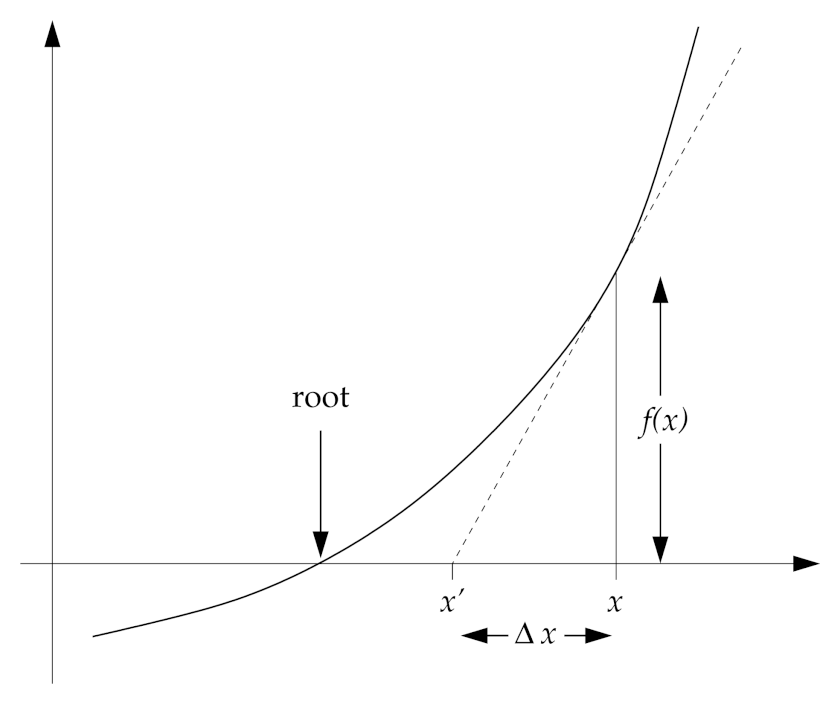

It begins with an estimate of the solution, $x$.  An improved estimate is then computed by finding the slope at $x$, which is $f'\left(x\right)$, and using it to extrapolate an estimate for the root.

From the figure, we see that the slope at $x$ is:

$ f'\left(x\right) = \frac{f\left(x\right)}{\Delta x}$

Which we can use to find our updated estimate, $x'$ by:

$x' = x-\Delta x = x - \frac{f\left(x\right)}{f'\left(x\right)}$

Similar to the relaxation method, we then use $x'$ as our new estimate, which we then improve with another iteration of Newton's method.  We continue with this until our estimate of the root has sufficient accuracy.

**Activity:** Modify the code for the relaxation method (or start from scratch) to implement Newton's method.  Use it to find the solution to the equation:

$ 1 = x \ln \left(1 + x\right)$

It may help to know this derivative:

$ \frac{d}{dx}\left( x \ln \left(1 + x\right)\right) = \ln\left(1+x\right) + \frac{x}{1+x}$.

There are two solutions to this function.  To find them both, you should try initial estimates of $x = -0.5$ and $x = 2.0$.  How quickly does Newton's method converge to a solution?

In [4]:
import numpy as np

x = 2.0

def f(x):
  return x * np.log(1+x) -1

def fprime(x):
  return np.log(1+x) + x/(1+x)

print("Initial estimate of x =",x)
for i in range(10):
  x = x - f(x)/fprime(x)
  print("Iteration %i gives x="%(i+1),x)

Initial estimate of x = 2.0
Iteration 1 gives x= 1.3217929813766052
Iteration 2 gives x= 1.2414616734833628
Iteration 3 gives x= 1.2399784096450759
Iteration 4 gives x= 1.2399778876566148
Iteration 5 gives x= 1.2399778876565501
Iteration 6 gives x= 1.2399778876565501
Iteration 7 gives x= 1.2399778876565501
Iteration 8 gives x= 1.2399778876565501
Iteration 9 gives x= 1.2399778876565501
Iteration 10 gives x= 1.2399778876565501


## The Secant Method

Newton's method will often quickly converge to the desired solution (although there are certainly cases where it will fail), but what if you don't know or can't calculate the derivative?  We've already discussed numerical methods to estimate derivatives, and we can take advantage of them here.  Remember that if we want to esimate the derivative at a point $x_2$ we need to know the value of the function at $x_2$ as well as at another nearby point which we'll call $x_1$.  The derivative can then be estimated by:

$f'\left(x_2\right) \approx \frac{f\left(x_2\right)-f\left(x_1\right)}{x_2-x_1}$

If we substitute this into Newton's method, we can get a new guess for our root by:

$x_3 = x_2 - f\left(x_2\right) \frac{x_2-x_1}{f\left(x_2\right)-f\left(x_1\right)}$.  

Our new guess, $x_3$ should (hopefully) be a better estimate of the root of our equation. 

**Activity:** Modify your code for Newton's method above to use the secant method.  Note that you will need to make the following change:

1.  You will need two initial values  of $x$, $x_1$ and $x_2$.  Try something like $x_1=2.0$ and $x_2=2.1$.
2.  You will need to keep track of the previous two $x$ values at each iteration.  You may want to keep track of the values of $x$ in either a list or using some temporary variables within your loop.
3.  You will not need to use the function's derivative. 

How do your results compare to what you found with Newton's method?

In [7]:
import numpy as np

x1 = 2.0
x2 = 2.1
epsilon = 1e-8

def f(x):
  return x * np.log(1+x) -1

i= 0
print("Initial estimate of x =",x2)
while epsilon < np.abs(x2-x1):
  x2_temp= x2
  x2 = x2 - f(x2) * (x2 - x1)/(f(x2)-f(x1))
  x1 = x2_temp
  i +=1
  print("Iteration %i gives x="%(i+1),x2)

Initial estimate of x = 2.1
Iteration 2 gives x= 1.3301110470847806
Iteration 3 gives x= 1.253070517372598
Iteration 4 gives x= 1.2402460844400982
Iteration 5 gives x= 1.2399787164691956
Iteration 6 gives x= 1.2399778877093137
Iteration 7 gives x= 1.2399778876565501


## Bisection

As an alternative method for finding roots (and therefore solutions) of nonlinear equation, consider a function like the one shown below which passes from having a positive to a negative value (or vice versa) over a region of space.  

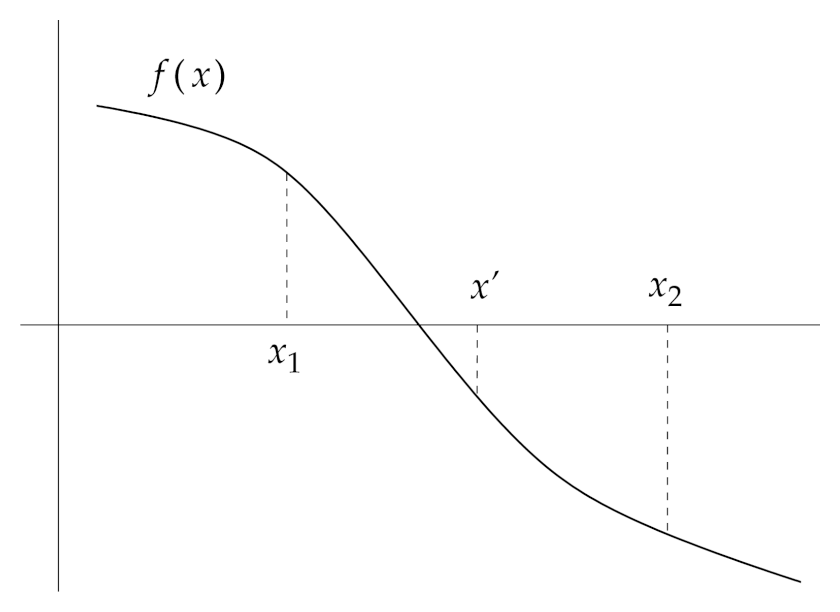

Our goal is to find the spot where the function crosses the x-axis.  To do that, we first pick two points that are on either side of the crossing (we say these points "bracket" the crossing).  We then want to narrow the range of $x$ values where the root could be, so we choose a point in the middle (which we'll call $x'$).  If, as in the figure above, $x'$ has the same sign as $x_2$, we know the root cannot be between $x'$ and $x_2$, we narrow our search range to be between $x_1$ and $x'$.  On the other hand, if $x'$ has the same sign as $x_1$, we know that the root cannot be between $x'$ and $x_1$, and we narrow our search range to be between $x'$ and $x_2$.  Either way, we've cut our range of possible $x$ values where the root can be in half.  We then repeat this algorithm many times, each time cutting the range of $x$ values in half, until we've found a small enough range that we know the value of the root (to within a given accuracy.


To implement this, we can use the following algorithm:

1.  Pick points on either side of the crossing.  That is, pick two points $x_1$ and $x_2$ and make sure one point has a positive value of $f\left(x\right)$ and the other has a negative value.

2.  Calculate the midpoint as $x' = \frac{1}{2}\left(x_1 + x_2\right)$ and evaluate $f\left(x'\right)$.

3.  If $f\left(x'\right)$ has the same sign as $f\left(x_1\right)$, set $x_1=x'$.  Otherwise set $x_2=x'$.

4.  Repeat steps 2 and 3 above until the desired level of accuracy is met.  When this is done, the final value of $\frac{1}{2}\left(x_1 + x_2\right) $ is the root estimate.

**Activity:** Below is a modified loop from above that implements the bisection method.  Use it to calculate the two solutions of the function:

$ 1 = x \ln \left(1 + x\right)$

To do that, you'll need to modify the code below to evaluate the function, and to have appropriate initial bounds for the root search.  How does the convergence of the bisection method compare to the Newton and secant methods?

In [6]:
import numpy as np

x1 = 1.0 
x2 = 2.0

def f(x):
  return x * np.log(1+x) - 1.0

print("Initial values are x1= %12.10f, x2 = %12.10f, and a midpoint of %12.10f" % (x1,x2,0.5*(x1+x2)))
for i in range(20):
  midpoint = 0.5 * (x2+x1)
  if np.sign(f(midpoint)) == np.sign (f(x1)):
    x1 = midpoint
  else:
    x2 = midpoint
  print("Iteration %i has x1= %12.10f, x2 = %12.10f, and a midpoint of %12.10f" % (i+1,x1,x2,0.5*(x1+x2)))

Initial values are x1= 1.0000000000, x2 = 2.0000000000, and a midpoint of 1.5000000000
Iteration 1 has x1= 1.0000000000, x2 = 1.5000000000, and a midpoint of 1.2500000000
Iteration 2 has x1= 1.0000000000, x2 = 1.2500000000, and a midpoint of 1.1250000000
Iteration 3 has x1= 1.1250000000, x2 = 1.2500000000, and a midpoint of 1.1875000000
Iteration 4 has x1= 1.1875000000, x2 = 1.2500000000, and a midpoint of 1.2187500000
Iteration 5 has x1= 1.2187500000, x2 = 1.2500000000, and a midpoint of 1.2343750000
Iteration 6 has x1= 1.2343750000, x2 = 1.2500000000, and a midpoint of 1.2421875000
Iteration 7 has x1= 1.2343750000, x2 = 1.2421875000, and a midpoint of 1.2382812500
Iteration 8 has x1= 1.2382812500, x2 = 1.2421875000, and a midpoint of 1.2402343750
Iteration 9 has x1= 1.2382812500, x2 = 1.2402343750, and a midpoint of 1.2392578125
Iteration 10 has x1= 1.2392578125, x2 = 1.2402343750, and a midpoint of 1.2397460938
Iteration 11 has x1= 1.2397460938, x2 = 1.2402343750, and a midpoint of 

**Activity**. You've now seen three (or four, depending on how you count) methods for solving nonlinear equations.  Discuss with your group what are the positives and negatives of each approach.  You should think not just about the performance you've observed, but also the assumptions that go into each model.

1. Relaxation method:

* Pros:
   * Easy to use and program
   * Converges relatively well when it works  
  
* Cons:
 * It won't converge in some cases, sometimes that can be alleviated by rewriting our equation, and sometimes it can't.

2. Newton's method

* Pros:
 * Converges very fast. 
 * Fairly robust.  

* Cons
 * Requires knowing the analytic derivative.  
 * In cases where there are many changes in the slope the answer can drift further away from the solution.  For example, if the point $x$ is picked for the function below, Newton's method will fail:

 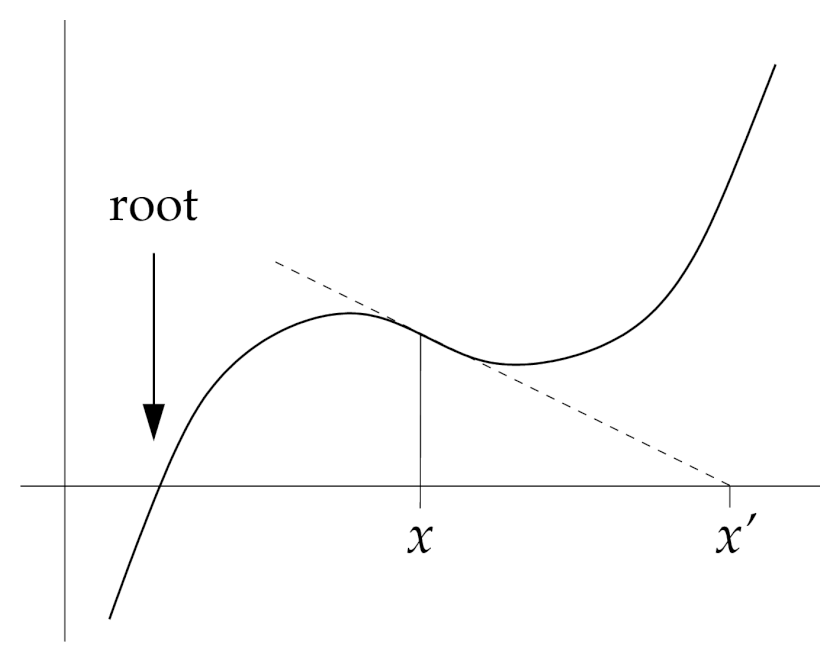

3. Secant method:

* Pros:
 * Converges very fast. 
 * Fairly robust. 
 * Doesn't require knowing the derivative.

* Cons:
 * Numerical issues can arise with computing the derivative.
 * In cases where there are many changes in the slope the answer can drift further away from the solution.

4.  Bisection method:

* Pros:
 * If there is a change of sign in the region between two points, it will find the solution.

* Cons:
 * Requires a change of sign (won't work on a function like $f(x)=x^2$, or if there are an even number of bracketed roots like in the function below:

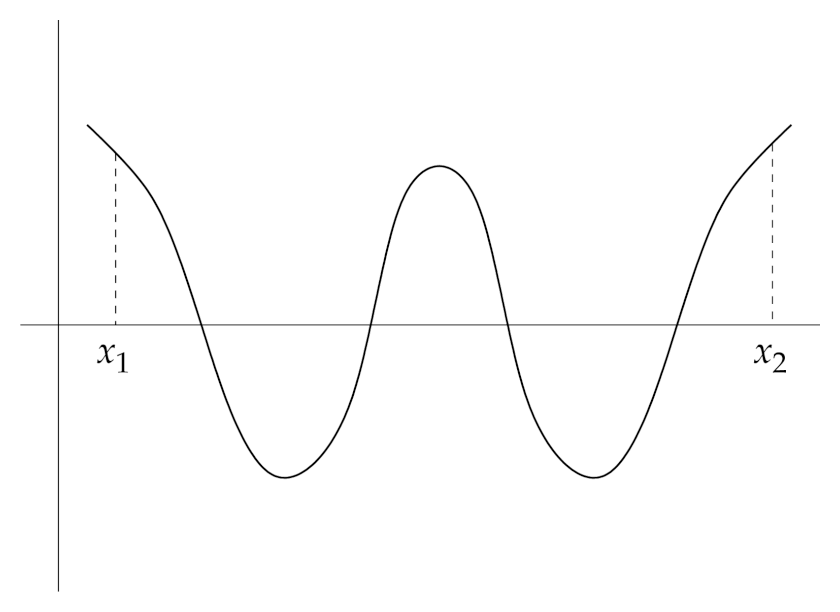

 * Somewhat slow


Which method should you use? It depends on your problem. Nonlinear equations behave differently in each of these methods, and you may find one method that works well for one problem won't work for another problem.  You may need to try one method and see if it converges to a sensible solution.  As long as you get convergence to a solution that makes sense, go ahead and use the relaxation method.  Newton's method is relatively safe though, and will typically work quickly.  Bisection will certainly work if the prerequisites for it are met. 
